# Task 2 DL | MSIB 6 - Celerates
---
This Asynchronous task of Deep Learning tackles the challenge of identifying potential COVID-19 cases using chest X-ray images. By leveraging the power of Convolutional Neural Networks (CNNs), a type of deep learning model skilled in image analysis, we aim to develop a system that can automatically classify these X-rays as either indicative of COVID-19 infection or negative for the virus. This approach has the potential to significantly improve the speed and accessibility of initial COVID-19 screening, offering a valuable tool for healthcare professionals in the fight against the pandemic.

*by ~ムアマル ヤシール* | credits @2024 All Right Reserved https://www.instagram.com/muamarasta

*Dataset Description*:
- NORMAL : normal lung X-ray image data
- COVID : lung X-ray image data affected by COVID

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [130]:
import numpy as np #numerical computing
import tensorflow as tf #define and train machine learning models using powerful computational graphs
%pylab inline #makes the imported functions available within the notebook cell for immediate use
import matplotlib.pyplot as plt #makes a plot
import matplotlib.image as mpimg #makes image plot
import os, shutil, glob #image processing
import matplotlib.cm as cm

from sklearn import metrics #classification report
from IPython.display import Image, display

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model


Populating the interactive namespace from numpy and matplotlib


1. Importing Libraries:

`import numpy as np`:** This line imports the numpy library, a fundamental library for scientific computing in Python. It provides efficient data structures like arrays (ndarray) for numerical operations, linear algebra functions, and random number generation. The alias np is commonly used for convenience, allowing you to use np. before NumPy functions and attributes (e.g., np.array(), np.mean()).

`import matplotlib.pyplot as plt`:** This line imports the matplotlib.pyplot module from the matplotlib library, a popular library for creating visualizations in Python. The alias plt is commonly used to access plotting functions and objects more concisely (e.g., plt.plot(), plt.show()).

2. Importing Keras (Deep Learning Library):

import keras:** This line imports the keras library, a high-level neural network API that's often used on top of TensorFlow (a deep learning framework). It provides a user-friendly way to build and train deep learning models.
3. Importing Specific Keras Components:

`from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten`:** This line imports several commonly used layers from the keras.layers module. These layers are the building blocks of neural networks:

- Dense: A fully connected layer for linear transformations.
- Conv2D: A convolutional layer for processing two-dimensional data like images (performs convolutions to extract features).
- MaxPool2D: A downsampling layer for reducing the dimensionality of image data while preserving important features.
- Dropout: A regularization technique that randomly drops neurons during training to prevent overfitting.
- Flatten: A layer that reshapes data from a multi-dimensional format (e.g., image) into a one-dimensional vector suitable for fully connected layers.

`from keras.models import Sequential`:** This line imports the Sequential model class from keras.models. This is used to define sequential neural network architectures, where layers are stacked one after another.

`from keras.preprocessing import image`:** This line imports the image module from keras.preprocessing. This module might include functions for image preprocessing tasks, such as resizing, normalization, and data augmentation (creating variations of images to improve model robustness).

# Split Data (Train&Test)

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1/255, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2
)

train_data = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset",
                                               target_size= (256,256), batch_size=1,
                                               class_mode = 'binary')

Found 3448 images belonging to 2 classes.


In [ ]:
test_datagen = image.ImageDataGenerator(
    rescale = 1/255
)

test_data = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset",
                                               target_size= (256,256), batch_size=1,
                                               class_mode = 'binary')

Found 3448 images belonging to 2 classes.


By combining `ImageDataGenerator` and `flow_from_directory`, we achieve the following:

**Augmentation**: Your training process won't be limited to the original images in your dataset. The generator will create random variations on the fly, effectively increasing the size and diversity of your training data. This helps combat overfitting (where the model memorizes the training data too well and doesn't generalize well to unseen data).

**On-demand Generation**: The generator efficiently reads images and applies augmentations in batches throughout training, reducing memory usage compared to loading all images upfront.

In [ ]:
train_data.class_indices

{'COVID': 0, 'NORMAL': 1}

## CNN Model with VGG-16

In [ ]:
model = Sequential() #create sequential model and the most common approach for building CNN

model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu', input_shape= (256,256,3))) #input layer of CNN

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu')) #extract features from the previous layer's output
model.add(MaxPool2D()) #pooling layer
model.add(Dropout(rate= 0.25)) #This helps prevent the model from overfitting to the training data by forcing it to learn more robust features

model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D())
model.add(Dropout(rate= 0.25))

model.add(Flatten()) #layer transforms the multi-dimensional feature maps from the convolutional layers
model.add(Dense(units= 64, activation= 'relu')) #fully connected layers
model.add(Dropout(rate= 0.50))
model.add(Dense(units= 1, activation= 'sigmoid')) #binary classification layer


model.compile(loss= keras.losses.binary_crossentropy, optimizer= 'adam', metrics= ['acc']) #used to monitor training and evaluation progress

- The CNN architecture uses convolutional layers to extract features from the input images.
- Pooling layers reduce the dimensionality of the data.
- Dropout layers help prevent overfitting.
- Fully connected layers perform the final classification task.
- The model is compiled with an appropriate loss function, optimizer, and metric for binary classification.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                   

`model.summary()` is a valuable tool for:

- **Verifying Model Structure**: You can ensure that you've added the intended layers with the correct configurations.
- **Understanding Data Flow**: The output shapes of each layer help you visualize how the data dimensions change as it progresses through the network.
- **Estimating Model Complexity**: The total trainable parameter count gives you an idea of how complex your model is.
- **Debugging Potential Issues**: If the output shapes or parameter counts don't match your expectations, it might indicate errors in your model definition.

### Model Result

In [ ]:
results= model.fit(train_data, steps_per_epoch= 8, epochs= 10, validation_steps= 2,
                   validation_data= test_data,
                   verbose= 1
                    )

Epoch 1/10
8/8 [==============================] - 571s 81s/step - loss: 0.5855 - acc: 0.7500 - val_loss: 0.6130 - val_acc: 0.6952
Epoch 2/10
8/8 [==============================] - 452s 64s/step - loss: 0.6883 - acc: 0.6250 - val_loss: 0.6156 - val_acc: 0.8785
Epoch 3/10
8/8 [==============================] - 451s 64s/step - loss: 0.5347 - acc: 0.7500 - val_loss: 0.5924 - val_acc: 0.8692
Epoch 4/10
8/8 [==============================] - 510s 73s/step - loss: 0.5531 - acc: 0.8750 - val_loss: 0.5456 - val_acc: 0.8553
Epoch 5/10
8/8 [==============================] - 510s 73s/step - loss: 0.3964 - acc: 0.8750 - val_loss: 0.3843 - val_acc: 0.8860
Epoch 6/10
8/8 [==============================] - 486s 69s/step - loss: 0.3885 - acc: 0.8750 - val_loss: 0.4096 - val_acc: 0.8675
Epoch 7/10
8/8 [==============================] - 451s 64s/step - loss: 0.1239 - acc: 1.0000 - val_loss: 13.6408 - val_acc: 0.4716
Epoch 8/10
8/8 [==============================] - 513s 73s/step - loss: 4.7871 - acc: 0.6

### Accuracy

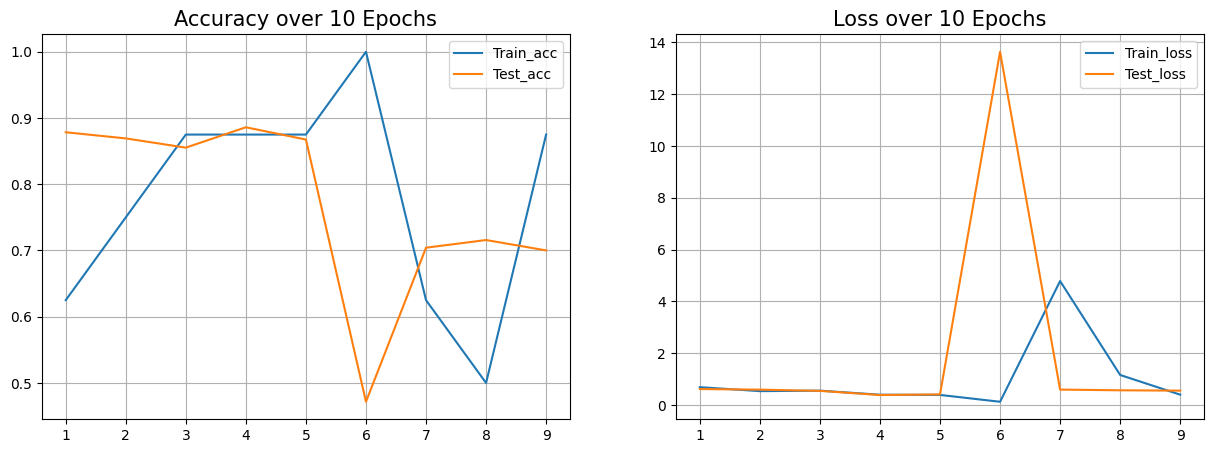

In [ ]:
def plot_acc_loss(results, epochs):
 acc = results.history['acc']
 loss = results.history['loss']
 val_acc = results.history['val_acc']
 val_loss = results.history['val_loss']

 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)

 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15),


 plt.legend()
 plt.grid(True)
 plt.show()

plot_acc_loss(results, 10)

### Classification

Populating the interactive namespace from numpy and matplotlib
1/1 [==============================] - 0s 474ms/step


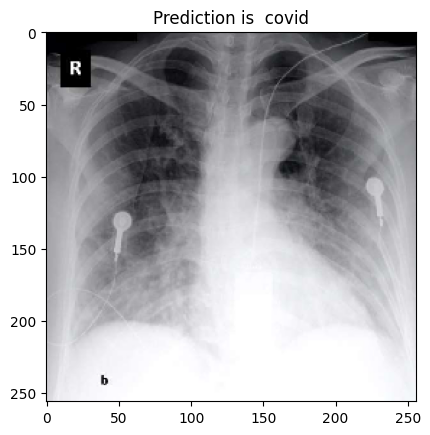

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset/COVID/COVID_9.png')
imgplot = plt.imshow(img)

test_image = image.load_img('/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset/COVID/COVID_9.png', target_size = (256, 256, 3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'

#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )
#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib
1/1 [==============================] - 0s 296ms/step


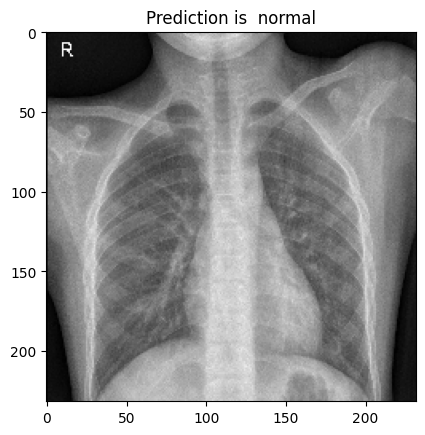

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset/NORMAL/NORMAL_10.png', target_size = (256, 256, 3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

img=mpimg.imread('/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset/NORMAL/NORMAL_10.png')
imgplot = plt.imshow(img)

if result[0][0] == 0:
    prediction = 'covid'
else:
    prediction = 'normal'

#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )

# Image Working

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset"
imgs = ['COVID', 'NORMAL']

NEW_DIR = "/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset"

This Python code copies all PNG images from a specified directory (ROOT_DIR) to a new folder named "all_images". You'll need to replace ROOT_DIR with the actual path to your image folder.

In [ ]:
# Copy all my images to a new folder i.e all_images

if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")

    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)

else:
  print("Already Exist")

# Count Images

In [ ]:
counter = {'COVID':1626,'NORMAL':1802}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

# the number of images i have in each class
counter

{'COVID': 1626, 'NORMAL': 1802}

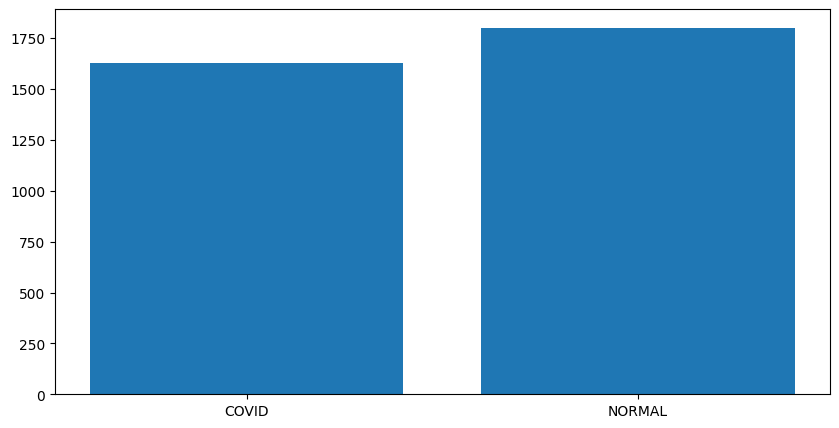

In [ ]:
#visualizing the number of images

plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

# Definition of Data

Overall process:

- The `ImageDataGenerator` object is created with the specified data augmentation techniques.
- The `.flow_from_directory` method is called to generate batches of training data. This method reads images from the specified directory, applies the pre-processing function, performs random zoom, horizontal flip, and shear if enabled, and resizes them to the target size.
- These modified images are then fed into your deep learning model for training, testing, and validation.

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                    zoom_range= 0.2,
                                    horizontal_flip= True,
                                    shear_range= 0.2,

                                    )

train = train_data_gen.flow_from_directory(directory= "/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset",
                                           target_size=(224,224))

Found 3448 images belonging to 2 classes.


In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= "/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset",
                                                target_size=(224,224))

Found 3448 images belonging to 2 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= "/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset",
                                          target_size=(224,224),
                                          shuffle= False)

Found 3448 images belonging to 2 classes.


In [ ]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}

In [ ]:
# to visualize the images in the traing data generator

t_img , label = train.next()

This function below iterates through an array of images, creates a figure window for each image, displays the image in grayscale (if necessary), sets the title to the image's shape, turns off the axis labels, and then shows the plot.

In [ ]:
# function when called will prot the images

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

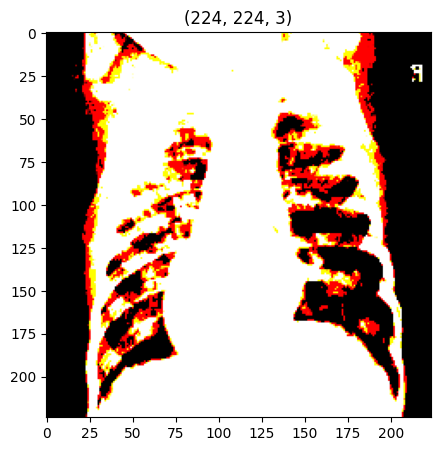

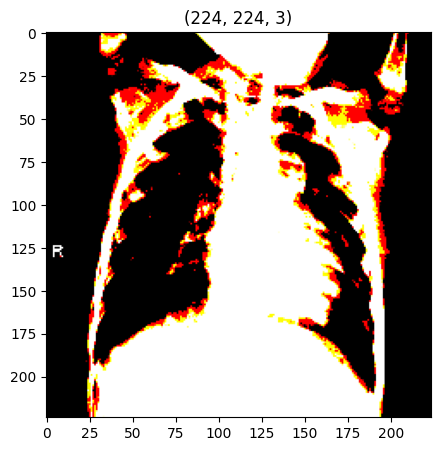

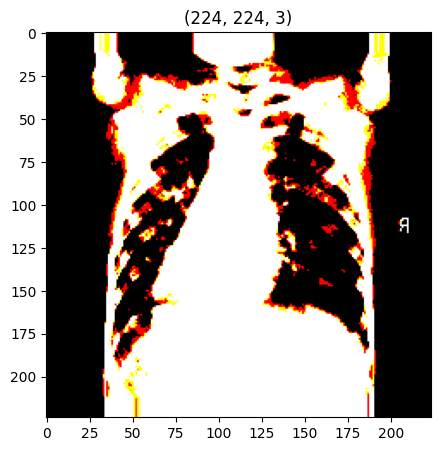

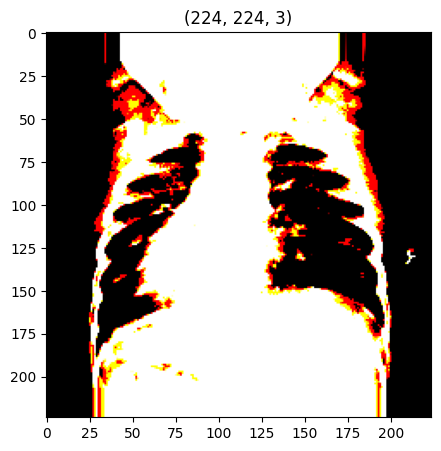

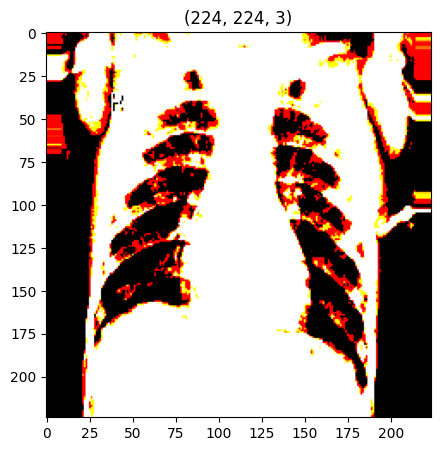

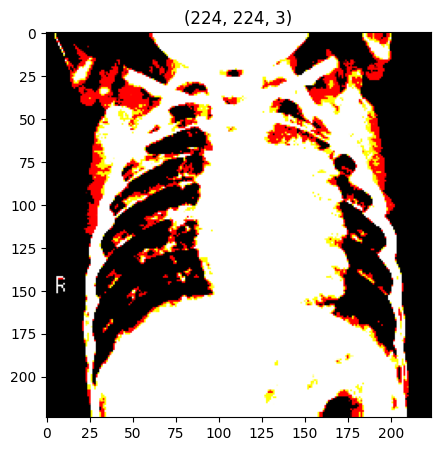

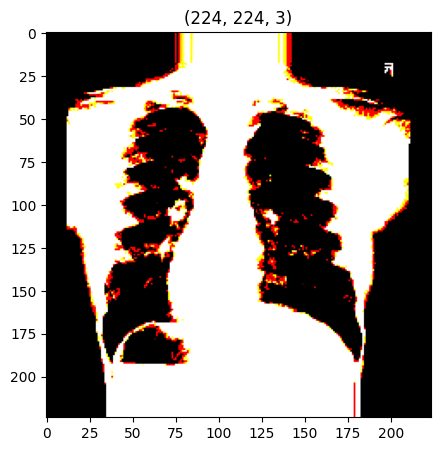

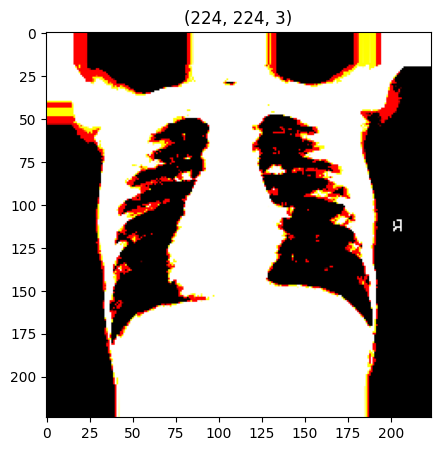

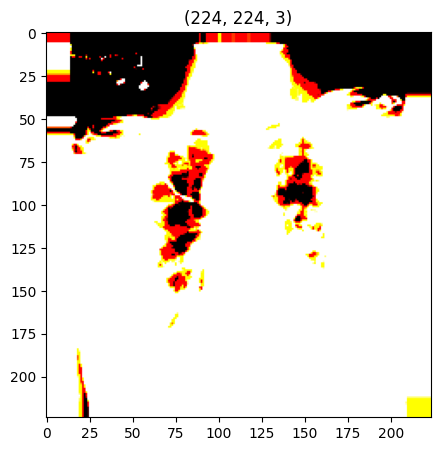

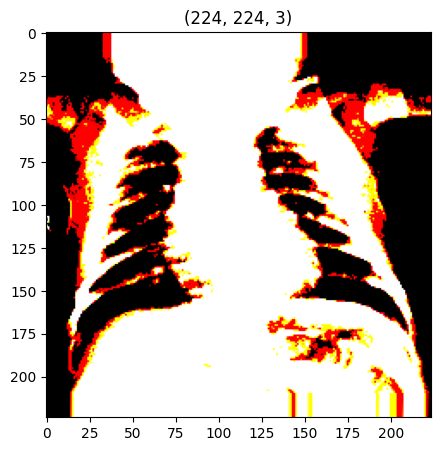

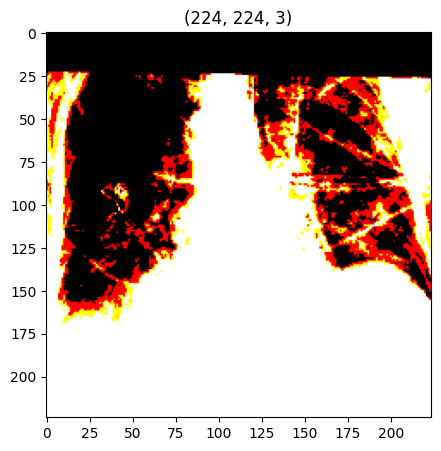

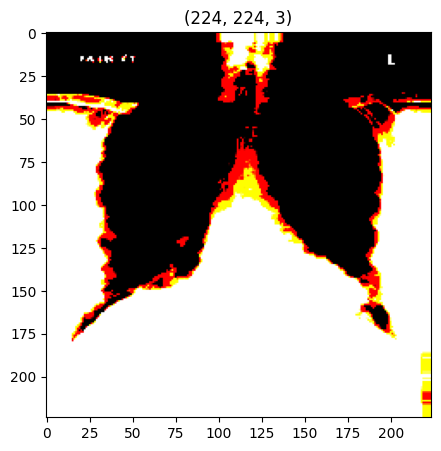

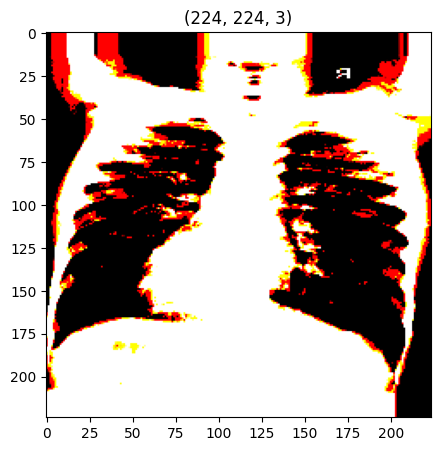

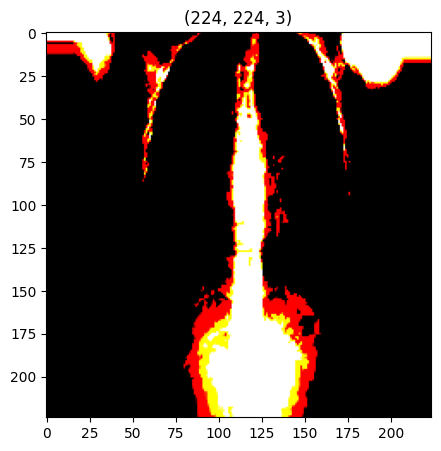

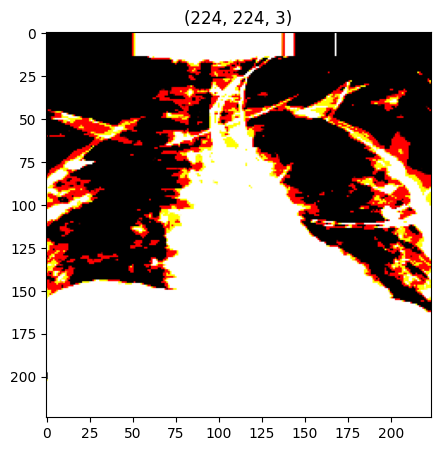

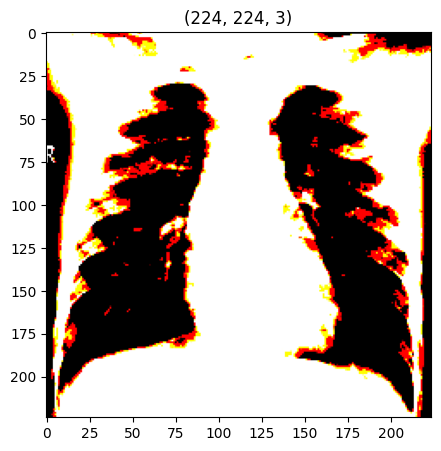

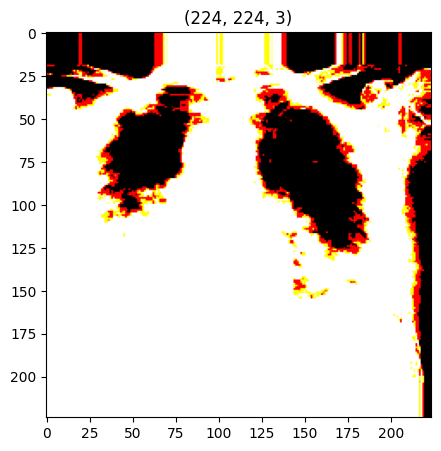

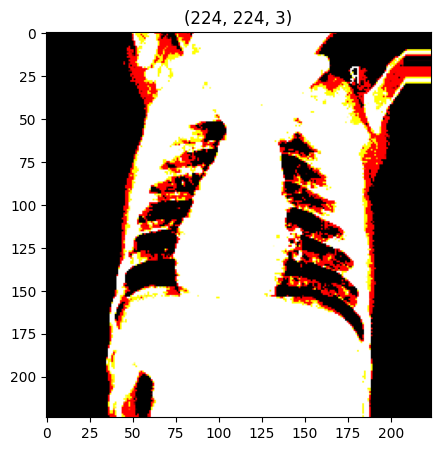

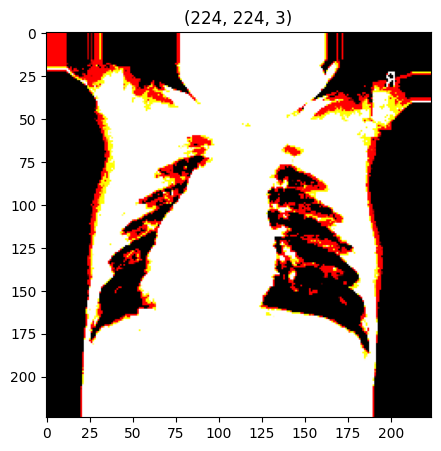

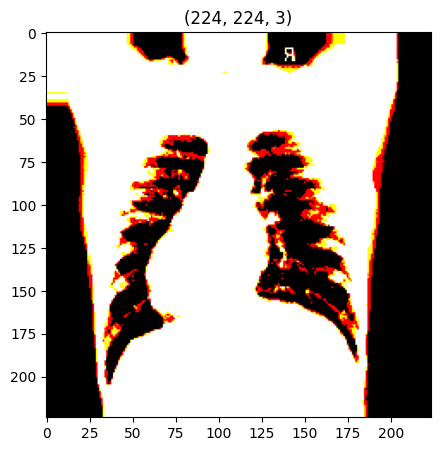

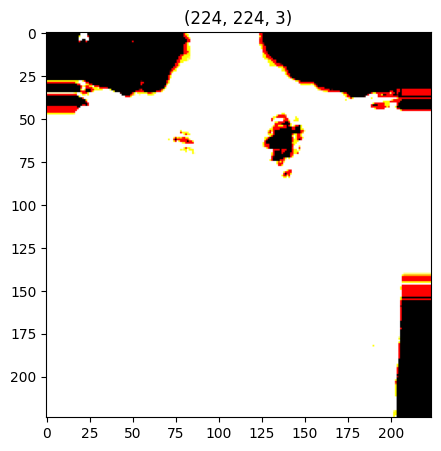

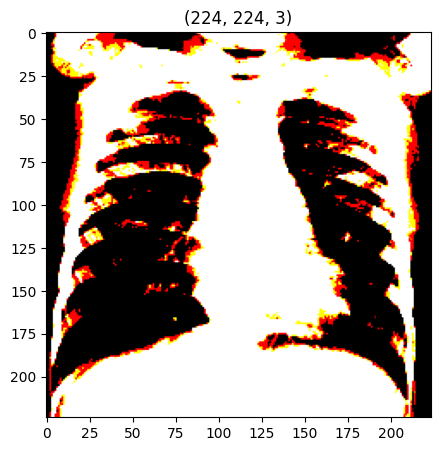

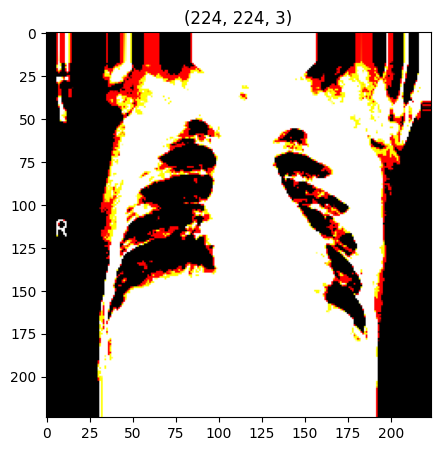

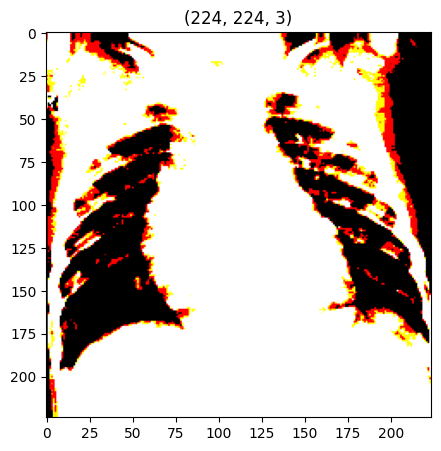

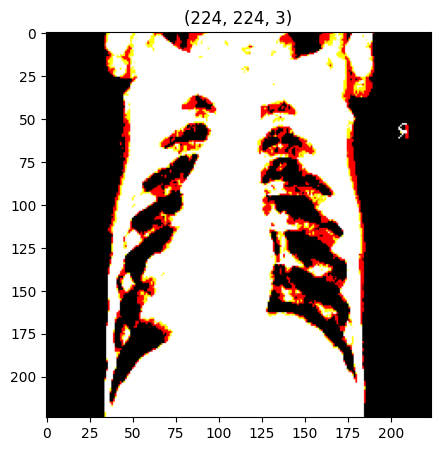

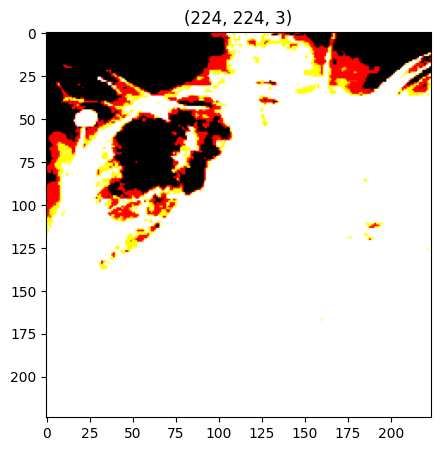

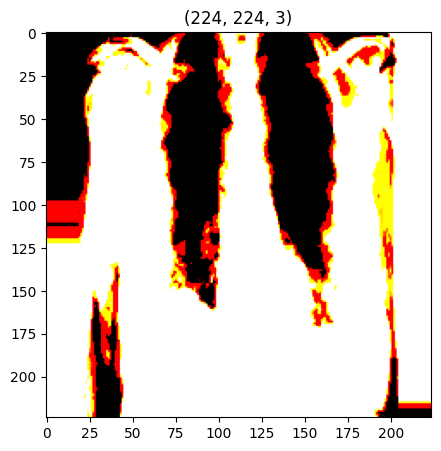

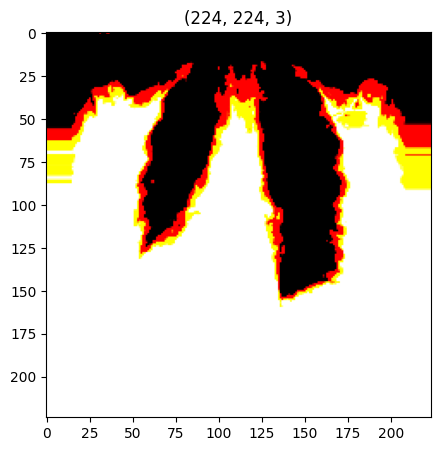

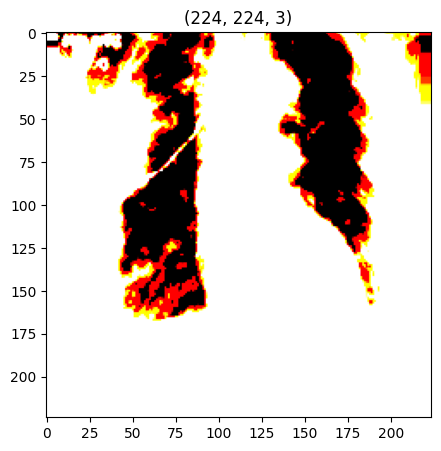

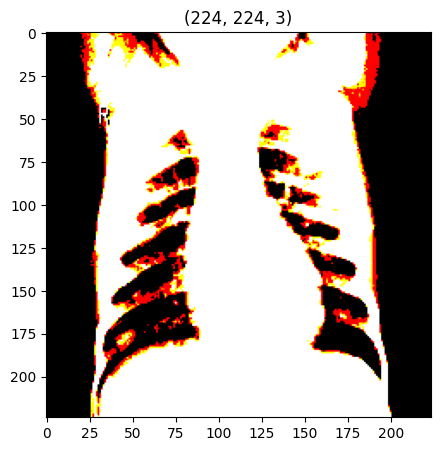

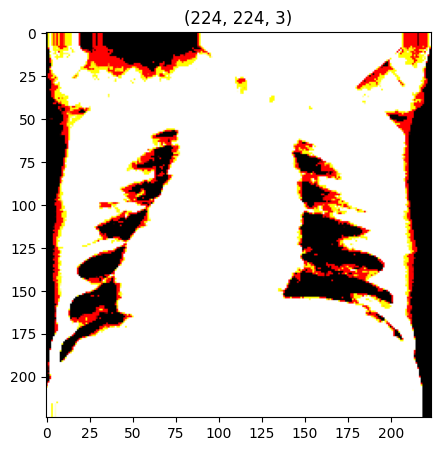

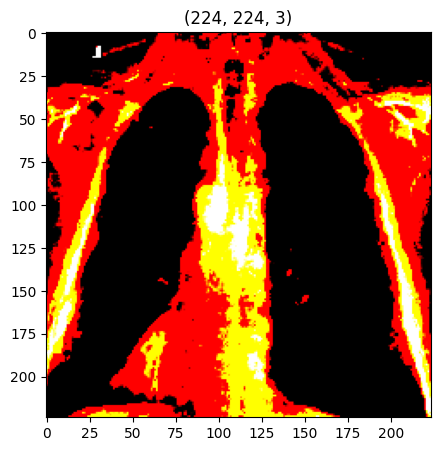

In [ ]:
# function call to plot the images

plotImages(t_img, label)

## CNN Model with ResNet

The ResNet-50 model consists of 5 stages each with a convolution and Identity block. Each convolution block has 3 convolution layers and each identity block also has 3 convolution layers. The ResNet-50 has over 23 million trainable parameters

In [ ]:
res = ResNet50( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

94765736/94765736 [==============================] - 1s 0us/step


In essence, this code snippet helps you leverage a pre-trained model (res) for your specific task by freezing the weights of its layers and only training a subset of the layers on your data

In [ ]:
for layer in res.layers:           # Dont Train the parameters again
  layer.trainable = False

This code below creates a new model (`model_2`) that leverages the pre-trained model (`res`) for feature extraction and adds a new fully-connected layer (`predictions`) with two outputs and a sigmoid activation function on top. This is a typical setup for binary classification tasks where the model needs to predict the probability of an instance belonging to one of two classes.

In [ ]:
x = Flatten()(res.output)
x = Dense(units= 2 , activation='sigmoid', name = 'predictions' )(x)

# creating our model.
model_2 = Model(res.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model_2.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# implementing early stopping and model check point

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In essence, by using both **Early Stopping** and **Model Checkpoint** together, we can achieve more efficient training by stopping when further improvement is unlikely  and saving the best performing model for later use.

### Result

In [ ]:
hist = model_2.fit(train, steps_per_epoch= 10, epochs= 5, validation_data= valid , validation_steps= 12, callbacks=[es,mc])

Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: 0.7510 - accuracy: 0.9875
Epoch 1: val_accuracy improved from -inf to 0.99023, saving model to bestmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 213s 23s/step - loss: 0.7510 - accuracy: 0.9875 - val_loss: 0.1790 - val_accuracy: 0.9902
Epoch 2/5
10/10 [==============================] - ETA: 0s - loss: 1.0029 - accuracy: 0.9812
Epoch 2: val_accuracy did not improve from 0.99023
10/10 [==============================] - 222s 23s/step - loss: 1.0029 - accuracy: 0.9812 - val_loss: 0.2166 - val_accuracy: 0.9863
Epoch 3/5
10/10 [==============================] - ETA: 0s - loss: 1.0265 - accuracy: 0.9875
Epoch 3: val_accuracy did not improve from 0.99023
10/10 [==============================] - 215s 23s/step - loss: 1.0265 - accuracy: 0.9875 - val_loss: 0.7810 - val_accuracy: 0.9824
Epoch 4/5
10/10 [==============================] - ETA: 0s - loss: 0.7231 - accuracy: 0.9844
Epoch 4: val_accuracy improved from 0.99023 to 0.99219, saving model to bestmodel.h5
10/10 [==============================] - 182s 19s/step - loss: 0.7231 - accuracy: 0.9844 - val_loss: 0.2794 - val_accuracy: 0.9922
Epoch 4: e

In [109]:
## load only the best model
from keras.models import load_model
model = load_model("bestmodel.h5")

### Performance

In [110]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

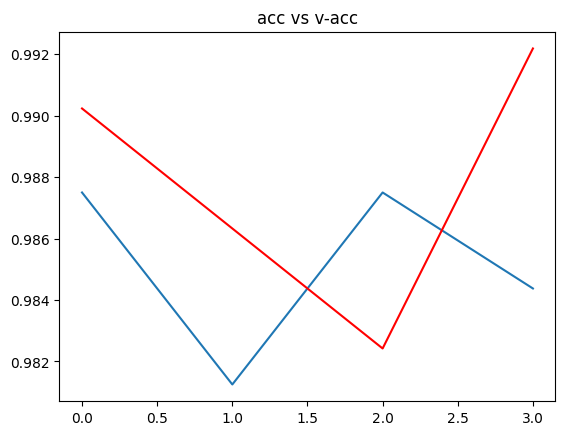

In [111]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

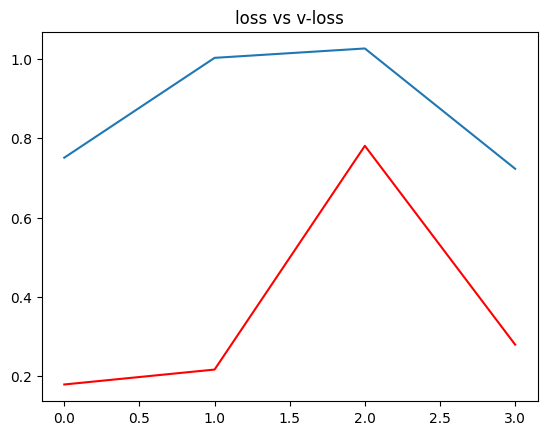

In [112]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

### Accuracy

In [115]:
# checking out the accurscy of our model

acc = model_2.evaluate_generator(generator= test)[1]

print(f"The accuracy of your model is = {acc} %")

<ipython-input-115-34ac7460603f>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model_2.evaluate_generator(generator= test)[1]


The accuracy of your model is = 0.9869489669799805 %


#### Image Classification

In [117]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

1/1 [==============================] - 0s 333ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 0s 309ms/step
The chances of image being Covid is : 100.0 percent

1/1 [==============================] - 0s 314ms/step
The chances of image being Normal is : 1.6838084114218133e-26 percent


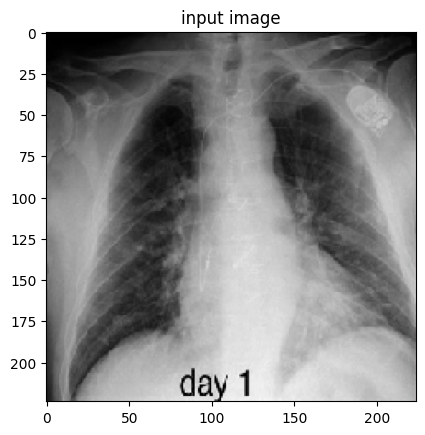

In [125]:
# path for that new image. ( you can take it either from google or any other scource)

path = "/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset/COVID/COVID_25.png"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

#### Predict Image

In [131]:
# this function is udes to generate the heat map of aan image
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [132]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [133]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "conv5_block3_3_conv", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """

  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()
  print()
  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing region on interest")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

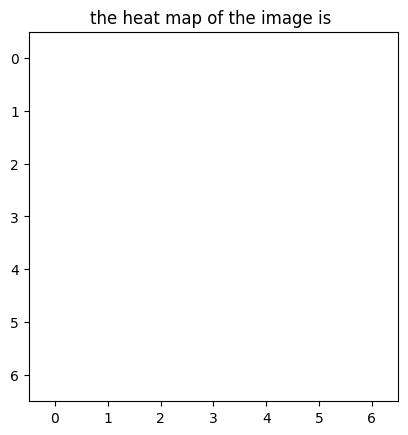


1/1 [==============================] - 1s 646ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 0s 326ms/step
The chances of image being Covid is : 100.0 %
1/1 [==============================] - 0s 322ms/step
The chances of image being Normal is : 1.6838084114218133e-26 %

image with heatmap representing region on interest


<ipython-input-132-884f7ca17958>:12: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)
<ipython-input-132-884f7ca17958>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


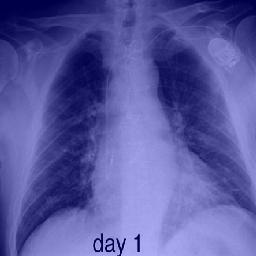


the original input image



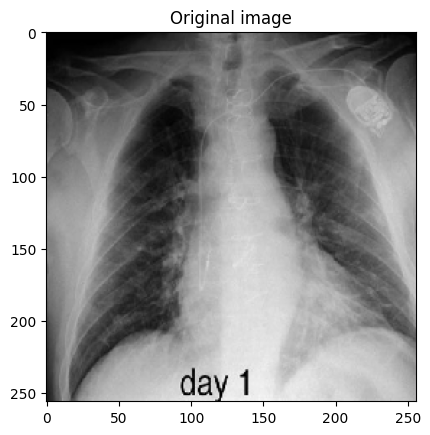

In [134]:

#predictions
# provide the path of any image from google or any other scource
# the path is already defigned above , but you can also provide the path here to avoid scrolling up

# for covid image :  path:- provide any image from google or provide image from all image folder
path = "/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset/COVID/COVID_25.png"

image_prediction_and_visualization(path)

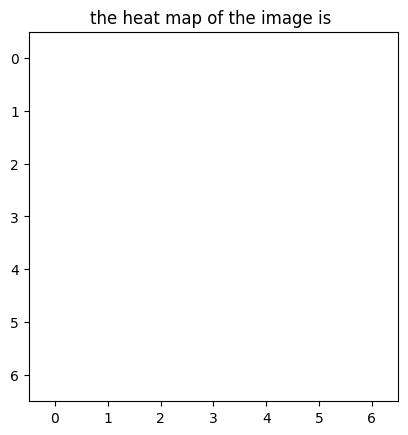


1/1 [==============================] - 0s 214ms/step
The given X-Ray image is of type = Normal

1/1 [==============================] - 0s 198ms/step
The chances of image being Covid is : 0.0 %
1/1 [==============================] - 0s 194ms/step
The chances of image being Normal is : 100.0 %

image with heatmap representing region on interest


<ipython-input-132-884f7ca17958>:12: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)
<ipython-input-132-884f7ca17958>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


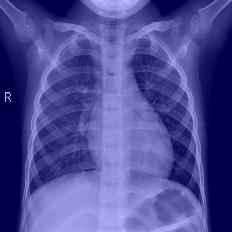


the original input image



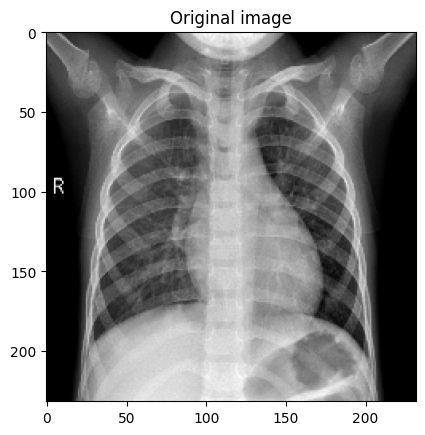

In [135]:
# for normal image :  path:- provide any image from google or provide image from all image folder
path = "/content/drive/MyDrive/Deep Learning/Asynchronous Task/Asyn 2/dataset/NORMAL/NORMAL_500.png"

image_prediction_and_visualization(path)

# for a healthey chest x-Ray heap map will be white thus the x-ray will look blue